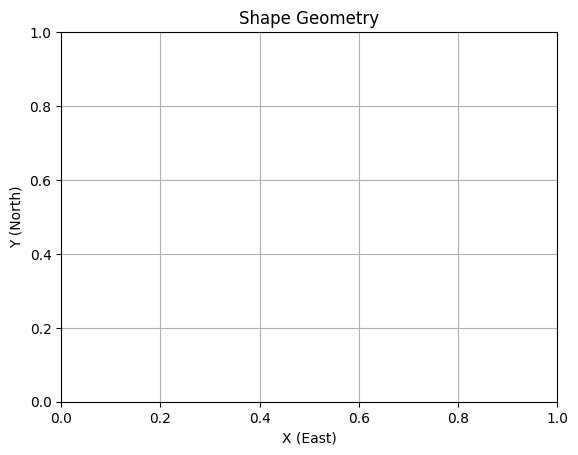

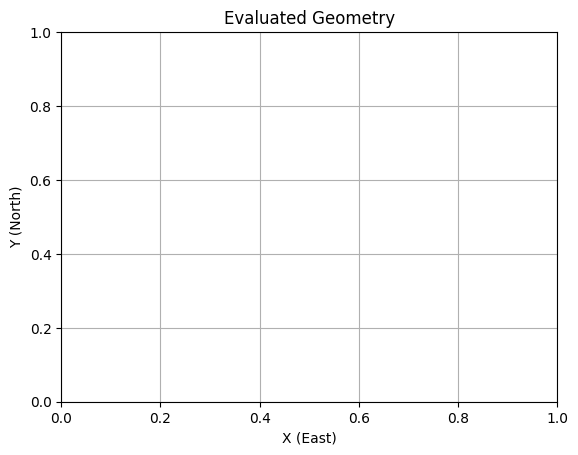

In [2]:
import ifcopenshell
import ifcopenshell.geom as geom
import ifcopenshell.ifcopenshell_wrapper
import numpy as np
import matplotlib.pyplot as plt
import ifcopenshell.api.alignment

# input file from github.com/IFC-Rail-Unit-Test-Reference-Code
#model = ifcopenshell.open("F:/IFC-Rail-Unit-Test-Reference-Code/alignment_testset/IFC-WithGeneratedGeometry/GENERATED__HorizontalAlignment_Clothoid_100.0_300_1000_1_Meter.ifc")
model = ifcopenshell.open("C:\\Users\\bricer\\OneDrive - Washington State Department of Transportation\\Desktop\\GenericSpiral.ifc")
#model = ifcopenshell.open("F:/IfcAlignmentDriver/TestFiles/PBPCD-TFNSW-PCBP-RW-M3D-000001.ifc")

settings = geom.settings()
#settings.set("FUNCTION_STEP_PARAM",0.01)

fig1 = plt.figure().add_subplot()
fig2 = plt.figure().add_subplot()

# Array of values for fig2
X = []
Y = []

curves = model.by_type("IfcCompositeCurve",False)
for curve in curves:
    #print(curve)
    ifcopenshell.api.alignment.print_composite_curve(curve)

    # Use ifcopenshell.geometry to process the curve shape
    shape = geom.create_shape(settings,curve)
    verts = shape.verts
    verts = np.array(verts).reshape((-1,3))
    x,y,z = verts.T
    fig1.plot(x,y,label="#" + str(curve.id()))

    # Use ifcopenshell_wrapper to map the curve into a piecewise function and
    # use the function_item_evaluator to compute the 4x4 matrix at discrete points
    mapped_shape = ifcopenshell.ifcopenshell_wrapper.map_shape(settings,curve.wrapped_data)
    evaluator = ifcopenshell.ifcopenshell_wrapper.function_item_evaluator(settings,mapped_shape)

    # get evaluation points from the function evaluator
    distances = evaluator.evaluation_points() 
    # compute a bunch of points along the curve
    #distances = [(mapped_shape.end() - mapped_shape.start())*d/100. for d in range(0,100)]

    # evaluate the points to get the 4x4 matrix
    for d in distances:
        m = evaluator.evaluate(d)
        X.append(m[0][3])
        Y.append(m[1][3])
    
        fig2.plot(X,Y,label="#" + str(curve.id()))

fig1.set_title("Shape Geometry")
fig1.set_xlabel("X (East)")
fig1.set_ylabel("Y (North)")
fig1.grid(True)


fig2.set_title("Evaluated Geometry")
fig2.set_xlabel("X (East)")
fig2.set_ylabel("Y (North)")
fig2.grid(True)

plt.show()
